**HR-аналитики компании «Работа с заботой»**
=

# Описание проекта
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. 

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

**Ход работы:**
1. Построим модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
2. Построим модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

# Описание данных

1. Тренировочная выборка: train_job_satisfaction_rate.csv
    * id — уникальный идентификатор сотрудника;
    * dept — отдел, в котором работает сотрудник;
    * level — уровень занимаемой должности;
    * workload — уровень загруженности сотрудника;
    * employment_years — длительность работы в компании (в годах);
    * last_year_promo — показывает, было ли повышение за последний год;
    * last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
    * supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
    * salary — ежемесячная зарплата сотрудника;
    * job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


2. Входные признаки тестовой выборки: test_features.csv
    * id — уникальный идентификатор сотрудника;
    * dept — отдел, в котором работает сотрудник;
    * level — уровень занимаемой должности;
    * workload — уровень загруженности сотрудника;
    * employment_years — длительность работы в компании (в годах);
    * last_year_promo — показывает, было ли повышение за последний год;
    * last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
    * supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
    * salary — ежемесячная зарплата сотрудника;


3. Целевой признак тестовой выборки: test_target_job_satisfaction_rate.csv
    * id — уникальный идентификатор сотрудника;
    * job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

# Установка библиотек

In [2]:
!pip install phik -q

In [3]:
! pip install shap -q

# Импортирование нужных библиотек для работы 

In [106]:
import warnings 
import matplotlib
import phik
import shap
import sklearn

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
    RandomizedSearchCV,
    
)

from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_score, 
    confusion_matrix,
    r2_score,
    mean_absolute_error, 
    mean_squared_error,
    roc_auc_score,
    make_scorer
)
 
from sklearn.preprocessing import (
    StandardScaler, 
    OneHotEncoder,
    MinMaxScaler, 
    LabelEncoder, 
    OrdinalEncoder,
    OneHotEncoder, 
    RobustScaler,
    QuantileTransformer
)

from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.impute import KNNImputer, SimpleImputer 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.compose import ColumnTransformer 
from scipy import stats 
from typing import List 
from scipy.stats import shapiro 
from sklearn.linear_model import Ridge 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier


RANDOM_STATE = 42
TEST_SIZE = 0.25

warnings.filterwarnings('ignore')

# Методы для работы

**Метод для построения диаграмм**

In [5]:
def create(data, column, type, bins = 100, color = 'blue', alpha = 0.5, edge_color='black', edge_width=1.2, rotation = 45):
    category_counts = data[column].value_counts()
    if type == "hist":
        """
        Создает гистограмму для заданного столбца DataFrame.
        """
        plt.figure(figsize=(12, 6))
        plt.hist(data=data, x=column, bins=bins, color=color, alpha=alpha, edgecolor=edge_color, linewidth=edge_width)
        plt.xlabel(column)
        plt.ylabel("Частота")
        plt.title(f'Призак {column} - Частота распределения', fontsize=18)
        plt.grid(True)
        plt.show()
    elif type == "barplot":
        plt.figure(figsize=(10, 6))
        plt.xticks(rotation=rotation)
        new_data = data[column].value_counts()
        df_new_data = new_data.reset_index()
        df_new_data.columns = [column, 'count']

        sns.barplot(x=column, y='count', data = df_new_data)
        plt.title(f'{column}.Частота распределения')
        plt.xlabel(f'{column}')
        plt.ylabel(f'количество {column}')
    elif type == "pie":
        """
        Создает круговую диаграмму для заданного столбца DataFrame.
        """
        plt.figure(figsize=(8, 8))
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Круговая диаграмма для {column}', fontsize=18)
        plt.show()
    elif type == "boxplot":
        # Создает ящик с усами для заданного столбца DataFrame.
        plt.figure(figsize=(10, 6))
        plt.boxplot(data[column], notch=True, patch_artist=True, boxprops=dict(facecolor=color, color=edge_color), 
                    whiskerprops=dict(color=edge_color), capprops=dict(color=edge_color), 
                    medianprops=dict(color=edge_color), flierprops=dict(markeredgecolor=edge_color, markerfacecolor=color))
        plt.xlabel(column)
        plt.title(f'Ящик с усами для признака {column}', fontsize=18)
        plt.grid(True)
        plt.show()

**Метод для теста Шапиро-Уилка**

In [6]:
def test_Shapiro_Wilk(data, column):
    alpha = 0.05  
    statistic, p_value = shapiro(data[column])
    print(f'Результат теста Шапиро-Уилка для столбца {column}:')
    print(f'Статистика теста: {statistic}')
    print(f'p-значение: {p_value}')
    if p_value > alpha:
        print('Распределение данных является нормальным.')
    else:
        print('Распределение данных не является нормальным.')

**Метод для отбора признаков**

In [7]:
def cat_num_col(df):
    num_col_names = list(df.select_dtypes(include=['int64', 'float64']).columns)
    cat_col_names = list(df.select_dtypes(include=['object']).columns)
    num_col_names.remove('id')
    return num_col_names, cat_col_names

**Метод для создания собственной метрики SMAPE**

In [8]:
def smape(y_test, pred): 
    metric = (100/len(y_test) * 
              np.sum(2 * np.abs(pred - y_test) / (np.abs(y_test) + np.abs(pred)))) * (-1)
    return metric

**Метод для построения диаграмм для сравнения сотрудников**

In [9]:
def compare_columns(df_stayed, df_left, column_name):
    plt.figure(figsize=(10, 6))

    stayed_percent = df_stayed[column_name].value_counts(normalize=True) * 100
    left_percent = df_left[column_name].value_counts(normalize=True) * 100

    index = range(max(len(stayed_percent), len(left_percent)))

    bar_width = 0.4

    plt.bar(index, stayed_percent, bar_width, alpha=0.6, color='blue', label='Остались')
    plt.bar([i + bar_width for i in index], left_percent, bar_width, alpha=0.6, color='orange', label='Уволились')

    plt.xlabel(column_name)
    plt.ylabel('Процент сотрудников')
    plt.title(f'Сравнение по признаку "{column_name}" между уволившимися и оставшимися сотрудниками')
    plt.xticks([i + bar_width / 2 for i in index], stayed_percent.index.union(left_percent.index))
    plt.legend()

    plt.tight_layout()
    plt.show()

# Задача 1

## Шаг 1. Загрузка данных

In [10]:
try:
    df_train_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    df_test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    df_test_target_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')
except:
    print('Файла не существует')

### Датасет df_train_job_satisfaction_rate

**Общая информация о датасете**

In [11]:
df_train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


**Первые строки датасета**

In [12]:
df_train_job_satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


**Вывод по датасету df_train_job_satisfaction_rate**

В датасете есть пропуски, типы данных корректны, возможно присутствуют дубликаты.

### Датасет df_test_features

**Общая информация о датасете**

In [13]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


**Первые строки датасета**

In [14]:
df_test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


**Вывод по датасету df_train_job_satisfaction_rate**

В датасете есть пропуски, типы данных корректны, возможно присутствуют дубликаты.

### Датасет df_test_target_job_satisfaction_rate

**Общая информация о датасете**

In [15]:
df_test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


**Первые строки датасета**

In [16]:
df_test_target_job_satisfaction_rate.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


**Вывод по датасету df_train_job_satisfaction_rate**

В датасете нет пропусков, типы данных корректны.

### Промежуточный вывод по загрузке данных

**Датасеты:**
* Тренировочная выборка: df_train_job_satisfaction_rate
* Входные признаки тестовой выборки: df_test_features
* Целевой признак тестовой выборки: df_test_target_job_satisfaction_rate

**Изучение датасетов:**
1. В датасетах df_train_job_satisfaction_rate и df_test_features есть пропуски. 
2. Типы данных корректны во всех трех датасетах. 
3. Возможно наличие дубликатов.

## Шаг 2. Предобработка данных

*Создадим список датафреймов:*

In [17]:
data_frames = [df_train_job_satisfaction_rate, df_test_features, df_test_target_job_satisfaction_rate]

In [18]:
num_col_train_job, cat_col_train_job = cat_num_col(df_train_job_satisfaction_rate)
num_col_test_features, cat_col_test_features = cat_num_col(df_test_features)

### Обработка дубликатов

#### Явные дубликаты

In [19]:
for data in data_frames: 
    data_name = [key for key, value in locals().items() if value is data][0]
    if data.duplicated(subset = data.columns).sum() > 0:
        display(data[data.duplicated()])
    else:
        print(f'Дубликаты в {data_name} отсутствуют')

Дубликаты в df_train_job_satisfaction_rate отсутствуют
Дубликаты в df_test_features отсутствуют
Дубликаты в df_test_target_job_satisfaction_rate отсутствуют


#### Неявные дубликаты

In [20]:
print('Датасет df_train_job_satisfaction_rate')
for col_name in cat_col_train_job:
    print(f'Уникальные значений в столбце {col_name}: {df_train_job_satisfaction_rate[col_name].unique()}')
print('\n')
print('Датасет df_test_features')
for col_name in cat_col_test_features:
    print(f'Уникальные значений в столбце {col_name}: {df_test_features[col_name].unique()}')

Датасет df_train_job_satisfaction_rate
Уникальные значений в столбце dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Уникальные значений в столбце level: ['junior' 'middle' 'sinior' nan]
Уникальные значений в столбце workload: ['medium' 'high' 'low']
Уникальные значений в столбце last_year_promo: ['no' 'yes']
Уникальные значений в столбце last_year_violations: ['no' 'yes']


Датасет df_test_features
Уникальные значений в столбце dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Уникальные значений в столбце level: ['junior' 'middle' 'sinior' nan]
Уникальные значений в столбце workload: ['medium' 'low' 'high' ' ']
Уникальные значений в столбце last_year_promo: ['no' 'yes']
Уникальные значений в столбце last_year_violations: ['no' 'yes']


### Обработка пропусков

In [21]:
for data in data_frames:
    data_name = [key for key, value in locals().items() if value is data][0]
    print(f'Прошущенные значения в {data_name}:\n{data.isnull().sum().sort_values()}\n')

Прошущенные значения в df_train_job_satisfaction_rate:
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
level                    4
dept                     6
dtype: int64

Прошущенные значения в df_test_features:
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
level                    1
dept                     2
dtype: int64

Прошущенные значения в df_test_target_job_satisfaction_rate:
id                       0
job_satisfaction_rate    0
dtype: int64



**Заменим пропущенные значения ' ' на np.nan**

In [22]:
df_test_features['dept'].replace(' ', np.nan, inplace=True)

df_test_features['workload'].replace(' ', np.nan, inplace=True)

In [23]:
print('Количество строк в датафрейме df_train_job_satisfaction_rate:', df_train_job_satisfaction_rate.shape[0])

print('Количество строк в датафрейме df_test_features:', df_test_features.shape[0])

print('Количество строк в датафрейме df_test_target_job_satisfaction_rate:', df_test_target_job_satisfaction_rate.shape[0])

Количество строк в датафрейме df_train_job_satisfaction_rate: 4000
Количество строк в датафрейме df_test_features: 2000
Количество строк в датафрейме df_test_target_job_satisfaction_rate: 2000


### Промежуточный вывод по предобработке данных

**Дубликаты отстутсвуют**

**Пропуски в датасетах df_test_features и df_train_job_satisfaction_rate были заменены на np.nan для дальнейшей обработки**

## Шаг 3. Исследовательский анализ данных

### Анализ данных

#### Анализ датасета df_train_job_satisfaction_rate с использованием метода describe

In [24]:
display(df_train_job_satisfaction_rate.describe())

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


**Employment Years:**
* Стандартное отклонение велико по сравнению со средним значением, что указывает на широкий разброс в количестве лет работы сотрудников.
* Максимальное значение в 10 лет не кажется необычным, но без дополнительного контекста нельзя с уверенностью сказать, является ли это выбросом.

**Supervisor Evaluation:**
* Среднее значение близко к медиане, что может указывать на относительно симметричное распределение оценок.
* Стандартное отклонение и диапазон значений кажутся разумными для шкалы от 1 до 5, не указывая на явные выбросы.

**Salary (Зарплата):**
* Зарплаты имеют значительное стандартное отклонение, что указывает на большой разброс значений.
* Максимальная зарплата в четыре раза выше медианного значения, что может свидетельствовать о наличии высоких выбросов, особенно если распределение зарплат не должно быть таким широким.

**Job Satisfaction Rate (Уровень удовлетворенности работой):**
* Стандартное отклонение низкое, что говорит о том, что большинство значений сосредоточены вокруг среднего.
* Минимальное значение очень низкое по сравнению с 25-м перцентилем, что может указывать на наличие низких выбросо

#### Анализ датасета df_train_job_satisfaction_rate с использованием диаграмм

**Признак 'salary'**

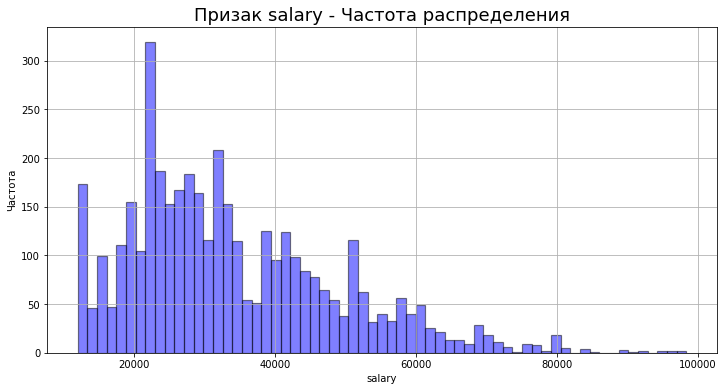

In [25]:
create(df_train_job_satisfaction_rate, 'salary', 'hist', bins = 63)

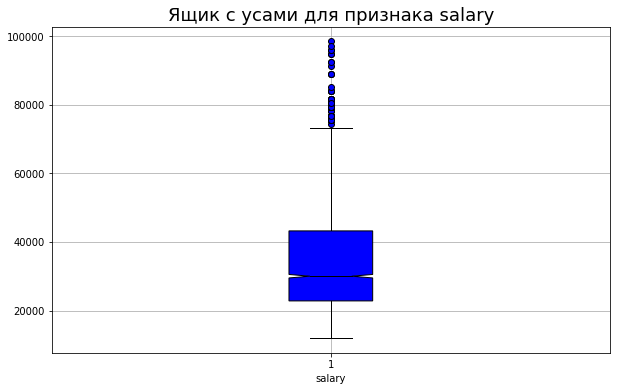

In [26]:
create(df_train_job_satisfaction_rate, 'salary', 'boxplot')

**Диаграмма hist**

Распределение зарплат имеет правостороннюю (положительную) асимметрию. Большинство зарплат сосредоточено в нижнем диапазоне, с уменьшением частоты в сторону высоких зарплат.

Наиболее часто встречающиеся зарплаты находятся в диапазоне от 20,000 до около 30,000.

Есть несколько отдельных столбцов, которые находятся вдалеке от основной массы данных, в диапазоне высоких зарплат (возможные выбросы).

**Диаграмма boxplot**

Boxplot подтверждает наличие выбросов в данных о зарплатах, что было предположено при анализе статистических метрик. Выбросы могут указывать на наличие необычно высокооплачиваемых должностей или ошибок в данных. 

**В контексте данной задачи не будем удалять данные, отображаемые как выбросы, так как такие значения заработной платы вполне возможны**

**Признак 'job_satisfaction_rate'**

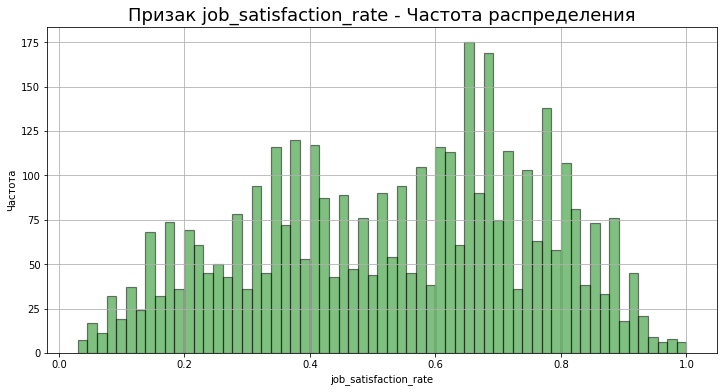

In [27]:
create(df_train_job_satisfaction_rate, 'job_satisfaction_rate', 'hist', bins = 63, color = 'green')

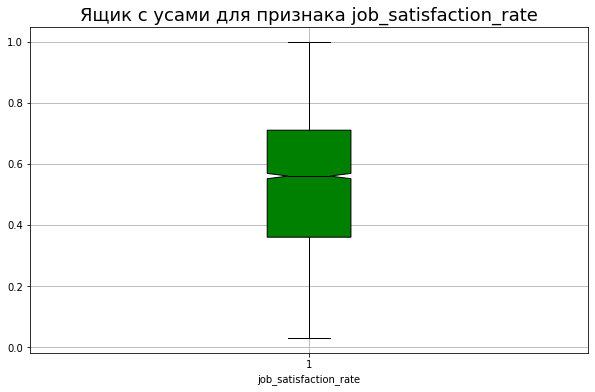

In [28]:
create(df_train_job_satisfaction_rate, 'job_satisfaction_rate', 'boxplot', color = 'green')

**Диаграмма hist**

Распределение удовлетворенности работой кажется довольно равномерным, с несколькими пиками в разных точках. Это может указывать на то, что существуют определенные группы сотрудников с разными уровнями удовлетворенности.

Самые высокие столбцы гистограммы находятся в диапазоне от 0.6 до 0.8

**Диаграмма boxplot**

Нет ярко выраженных выбросов

**Признак 'dept'**

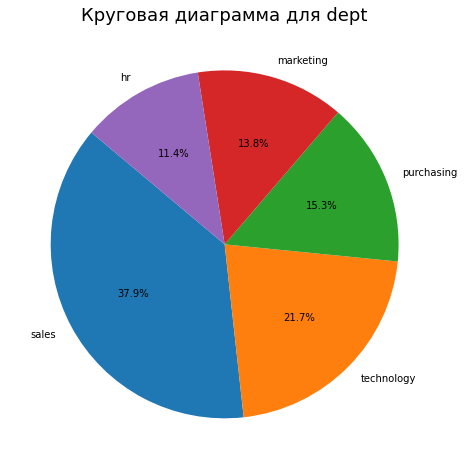

In [29]:
create(df_train_job_satisfaction_rate, 'dept', 'pie')

1. **sales:** Занимает самый большой сегмент диаграммы, 37.9%
2. **technology:** Составляет 21.7% от общего числа сотрудников
3. **purchasing:** Занимает 15.3%, что делает этот отдел третьим по численности сотрудников.
4. **marketing и HR :** Маркетинговый отдел составляет 13.8%, а HR — 11.4% от общего числа сотрудников, что делает их самыми малочисленными отделами среди представленных на диаграмме

Наибольшая доля сотрудников работает в отделе продаж, что может указывать на то, что это направление является ключевым для данной компании. Технологический отдел также составляет значительную часть, в то время как HR и маркетинговый отделы являются меньшими по размеру.

**Признак 'level'**

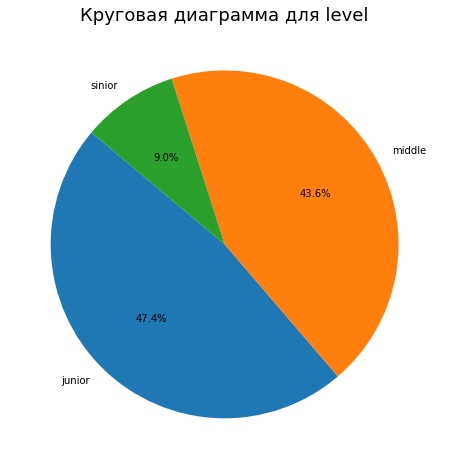

In [30]:
create(df_train_job_satisfaction_rate, 'level', 'pie')

* Junior: Эта категория занимает наибольшую часть диаграммы, 47.4%, что указывает на то, что почти половина сотрудников компании являются начинающими специалистами.
* Middle: Следующая по величине категория, занимающая 43.6%, что означает, что почти такое же большое количество сотрудников находятся на среднем уровне квалификации.
* Senior: Самая маленькая доля, 9.0%, что свидетельствует о том, что только меньшинство сотрудников достигли высокого уровня квалификации.

Большинство сотрудников находятся на начальном или среднем уровне, с относительно небольшим числом лиц, занимающих старшие позиции.

**Признак 'workload'**

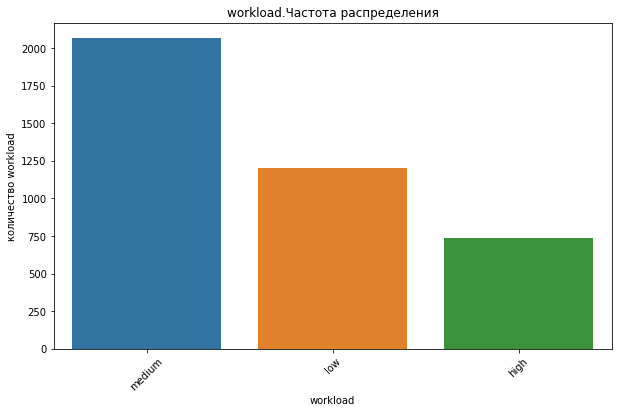

In [31]:
create(df_train_job_satisfaction_rate, 'workload', 'barplot')

* Большинство сотрудников имеет средний уровень рабочей нагрузки, превышая 2000 сотрудников.
* Сотрудников с низкой рабочей нагрузкой меньше, но их число также значительно и приближается к 1500.
* Сотрудников с высокой рабочей нагрузкой ещё меньше, их количество составляет чуть меньше 1000.

Умеренное распределение задач среди большинства сотрудников, с ограниченным числом сотрудников, испытывающих высокую или низкую нагрузку.

**Признак 'employment_years'**

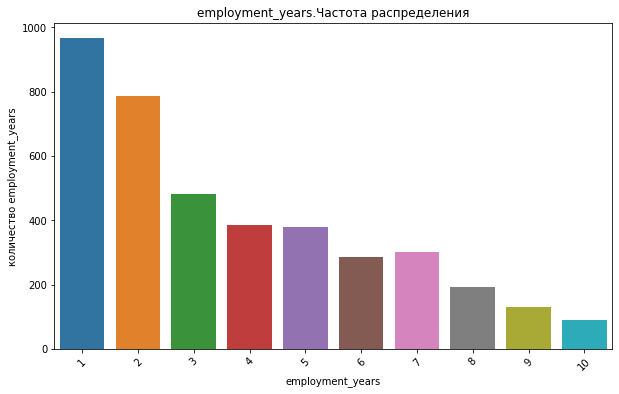

In [32]:
create(df_train_job_satisfaction_rate, 'employment_years', 'barplot')

* Наибольшее количество сотрудников (более 1000) работает в компании в течение одного года (1).
* С увеличением количества лет работы в компании количество сотрудников уменьшается; около 800 сотрудников работают в компании два года (2), и эта тенденция продолжается с уменьшением числа сотрудников для каждого последующего года.
* Самое маленькое количество сотрудников работает в компании в течение десяти лет (10), что представлено самым маленьким столбцом на диаграмме.

**Признак 'last_year_promo'**

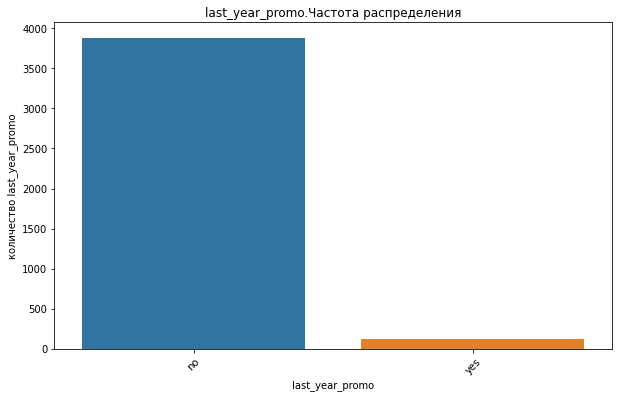

In [33]:
create(df_train_job_satisfaction_rate, 'last_year_promo', 'barplot')

* Очень большое количество сотрудников (более 3500) не получили повышения в прошлом году .
* Значительно меньшее количество сотрудников получили повышение, этот столбец на диаграмме почти незаметен по сравнению с количеством тех, кто не получил повышение

Это может влиять на мотивацию и удовлетворенность работой сотрудников, если повышения являются редким событием.

**Признак 'last_year_violations'**

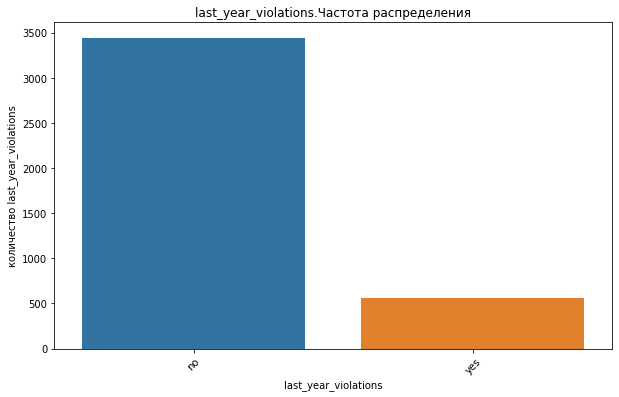

In [34]:
create(df_train_job_satisfaction_rate, 'last_year_violations', 'barplot')

* Большинство сотрудников (более 3000) не имели нарушений в прошлом году.
* Гораздо меньшее количество сотрудников имели нарушения, их число значительно меньше по сравнению с теми, кто не имел нарушений.

Эти данные могут свидетельствовать о хорошей дисциплине внутри компании или о том, что нарушения редко фиксируются или регистрируются.

**Признак 'supervisor_evaluation'**

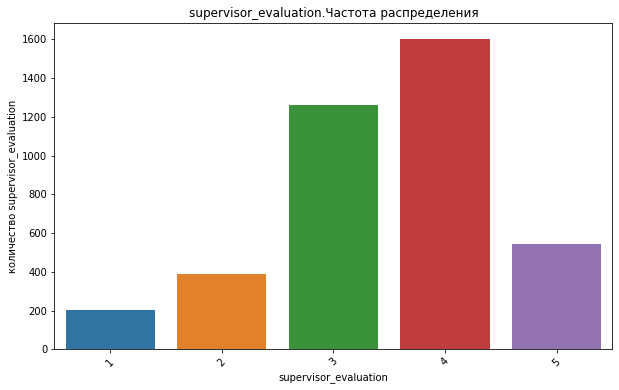

In [35]:
create(df_train_job_satisfaction_rate, 'supervisor_evaluation', 'barplot')

* Относительно малое количество сотрудников получило оценку 1, что является наименьшей возможной оценкой.
* Количество сотрудников, получивших оценку 2, увеличивается, но все еще остается низким по сравнению с другими оценками.
* Большое количество сотрудников получили оценку 3, что является средней оценкой на этой шкале.
* Наибольшее количество сотрудников получило оценку 4, что предполагает высокий уровень выполнения обязанностей или удовлетворения требованиям руководства.
* Сотрудников, получивших наивысшую оценку 5, меньше, чем тех, кто получил оценку 4, но больше, чем оценки 1 и 2.

В компании преобладает положительное восприятие сотрудников со стороны их руководителей, с тенденцией к выдаче оценок выше среднего. 

#### Вывод по датасету df_train_job_satisfaction_rate
1. Распределение зарплат сотрудников демонстрирует положительную асимметрию, с основной массой значений, сосредоточенной в нижнем диапазоне, и наличием потенциальных выбросов в верхнем диапазоне, что может указывать на наличие необычно высоких зарплат у некоторых сотрудников или ошибок в данных.
2. Уровень удовлетворенности работой распределен относительно равномерно с различными группами удовлетворенности, не показывая явных аномалий или выбросов.
3. В структуре компании преобладают сотрудники отдела продаж и технологий, в то время как отделы HR и маркетинга насчитывают меньше сотрудников.
4. Большая часть сотрудников занимает начальные и средние позиции, с меньшим количеством старших специалистов, что характерно для многих организаций.
5. Нагрузка на сотрудников в основном средняя, с меньшим числом сотрудников, испытывающих как высокие, так и низкие нагрузки.
6. Трудовой стаж сотрудников показывает, что большинство работает в компании не более нескольких лет, с уменьшением числа сотрудников с увеличением стажа, без выбросов на длительном конце.
7. Повышения в прошлом году получили немногие, что может указывать на строгую политику повышения или на то, что повышения рассматриваются индивидуально и не являются ежегодным ожидаемым событием.
8. Большинство сотрудников не имели нарушений в прошлом году, что может свидетельствовать о хорошей дисциплине внутри компании.
9. Оценки руководителей в большинстве своем высокие, с преобладанием оценок 4, и реже всего встречаются крайние низкие оценки, что может говорить о благоприятной оценочной политике или о возможных проблемах с критичностью оценок.

#### Анализ датасета df_test_features с использованием метода describe

In [36]:
display(df_test_features.describe())

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


**Employment Years:**
* Среднее значение: 3.66500 лет.
* Стандартное отклонение: 2.537222 лет, что показывает разнообразие стажа сотрудников.
* Минимальное значение: 1 год, максимальное значение: 10 лет

**Supervisor Evaluation:**
* Среднее значение: 3.526500, что может означать, что в среднем сотрудники получают оценки выше среднего от своих руководителей.
* Стандартное отклонение: около 1, что свидетельствует о некотором разнообразии в оценках, но в целом оценки сосредоточены вокруг среднего значения.
* Минимальное и максимальное значения оценок: 1 и 5 соответственно.

**Salary:**
* Стандартное отклонение: 15398.436729, указывающее на значительный разброс зарплат среди сотрудников.
* Минимальная зарплата: 12000, максимальная зарплата: 96000

#### Анализ датасета df_test_features с использованием диаграмм

**Признак 'salary'**

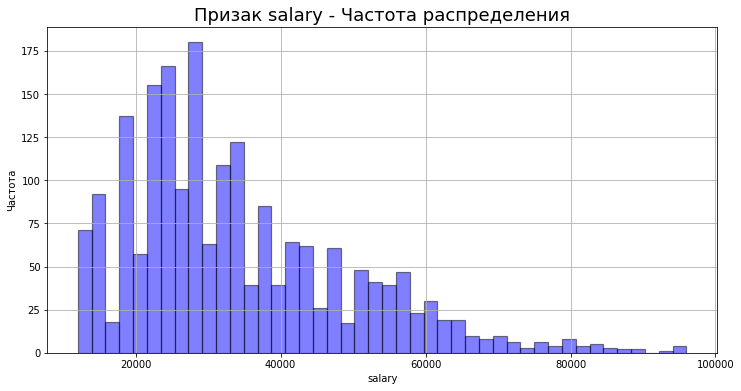

In [37]:
create(df_test_features, 'salary', 'hist', bins = 44)

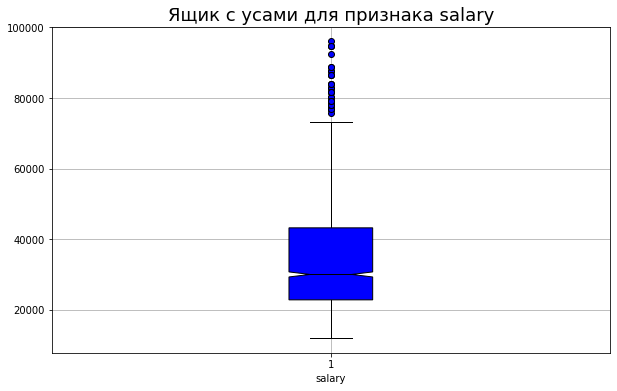

In [38]:
create(df_test_features, 'salary', 'boxplot')

Гистограмма показывает, что большинство зарплат сгруппированы в нижнем диапазоне, с наибольшим числом сотрудников, зарабатывающих около 20,000, и меньшими количествами сотрудников, зарабатывающих выше этой суммы. 

Ящик с усами показывает распределение зарплат сотрудников. Медиана зарплат (линия в середине ящика) находится ниже среднего уровня диапазона, что указывает на то, что больше сотрудников зарабатывают меньше средней зарплаты. Также наблюдаются выбросы, но удалять их не будем по аналогии с датасетом df_train_job_satisfaction_rate

**Признак 'dept'**

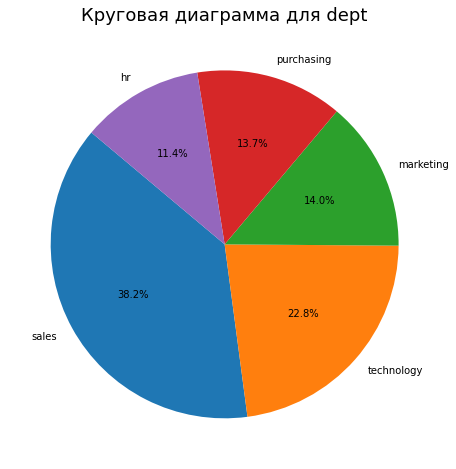

In [39]:
create(df_test_features, 'dept', 'pie')

* **Отдел продаж (sales):** Этот сектор является самым большим, занимая 38.2% диаграммы, что указывает на то, что этот отдел является крупнейшим в компании.

* **Технологический отдел (technology):** Составляет 22.8% от общего числа сотрудников, являясь вторым по величине отделом.

* **Отдел маркетинга (marketing):** Занимает 14.0%, что делает его третьим по размеру среди представленных отделов.

* **Отдел закупок (purchasing):** Составляет 13.7%, что является четвертым по величине отделом.

* **Отдел управления персоналом (HR):** Имеет долю в 11.4%, что делает его самым малочисленным отделом на диаграмме.

**Признак 'level'**

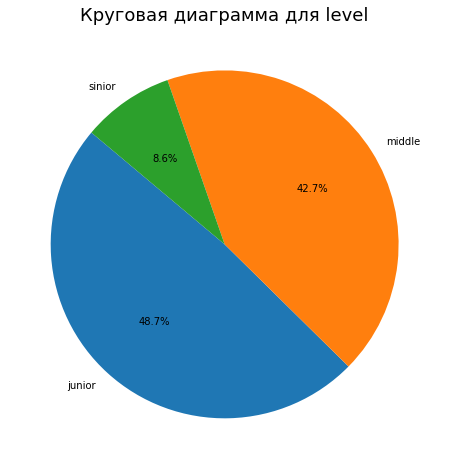

In [40]:
create(df_test_features, 'level', 'pie')

* **Junior:** Самый большой сегмент диаграммы, занимающий 48.7%, указывает на то, что почти половина всех сотрудников находится на начальном уровне квалификации.
* **Middle:** Второй по величине сегмент, составляющий 42.7%, показывает, что значительная часть сотрудников имеет средний уровень квалификации.
* **Senior:** Наименьший сегмент диаграммы, занимающий 8.6%, свидетельствует о том, что меньшинство сотрудников достигло старшего уровня квалификации.

**Признак 'workload'**

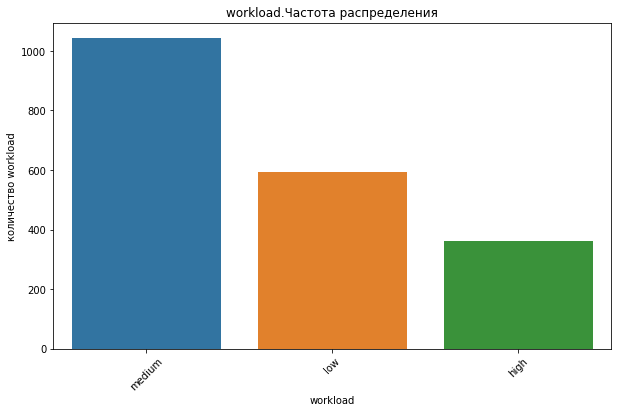

In [41]:
create(df_test_features, 'workload', 'barplot')

Из диаграммы видно, что большинство сотрудников имеет среднюю рабочую нагрузку, меньшее количество сотрудников имеет низкую рабочую нагрузку, и ещё меньше сотрудников испытывают высокую рабочую нагрузку. 

**Признак 'employment_years'**

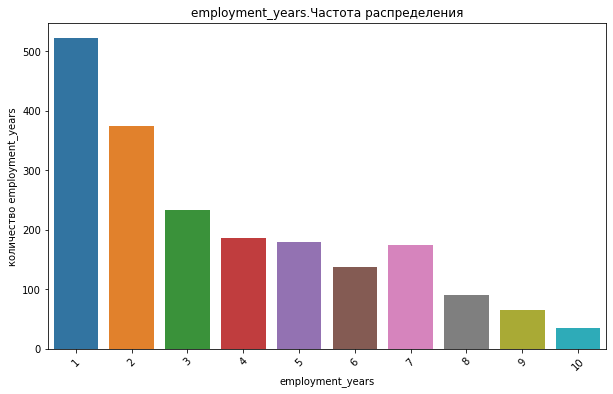

In [42]:
create(df_test_features, 'employment_years', 'barplot')

Наибольшее количество сотрудников работает в компании один год, с последующим уменьшением числа сотрудников с увеличением стажа. 

Наименьшее количество сотрудников работает в компании десять лет. 

**Признак 'last_year_promo'**

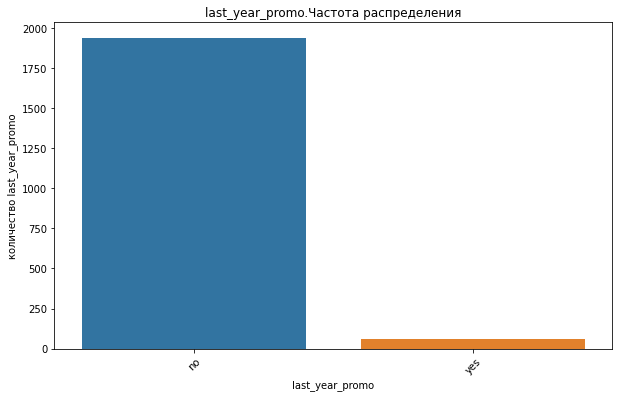

In [43]:
create(df_test_features, 'last_year_promo', 'barplot')

Столбец "no" значительно превышает столбец "yes", указывая на то, что большинство сотрудников не получило повышения. 

**Признак 'last_year_violations'**

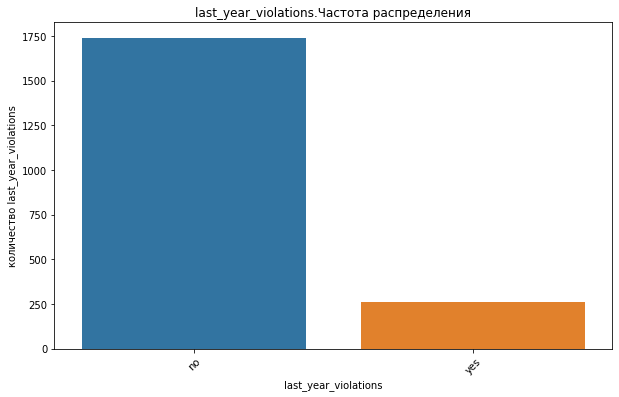

In [44]:
create(df_test_features, 'last_year_violations', 'barplot')

Столбец "no" значительно выше, чем столбец "yes", что указывает на то, что большинство сотрудников не имели нарушений в течение прошлого года.

**Признак 'supervisor_evaluation'**

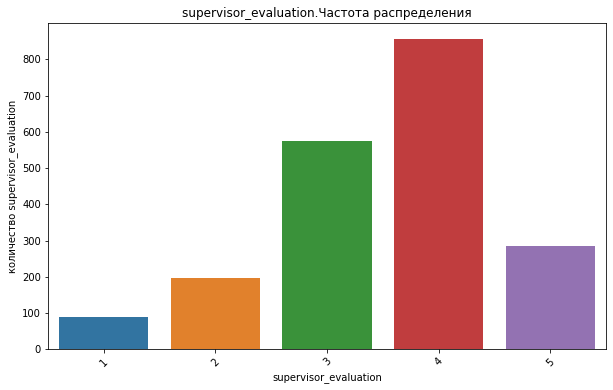

In [45]:
create(df_test_features, 'supervisor_evaluation', 'barplot')

* Относительно мало сотрудников получило оценку 1, что может указывать на минимальное количество сотрудников с низкой оценкой работы.
* Количество сотрудников, получивших оценку 2, увеличивается, но все еще остается довольно низким.
* Наибольшее количество сотрудников получило оценку 3, что может быть признаком среднего уровня выполнения обязанностей или среднего удовлетворения стандартами руководства.
* Очень большое количество сотрудников получило оценку 4, что свидетельствует о хорошем выполнении работы большинством сотрудников.
* Количество сотрудников, получивших наивысшую оценку 5, меньше, чем тех, кто получил оценки 3 и 4, но все же значительно.

#### Вывод по датасету df_test_features
1. Зарплаты сотрудников имеют склонность к концентрации в нижней части диапазона с наибольшим числом наблюдений около 20,000. Наличие выбросов указывает на возможное существование исключительно высокооплачиваемых позиций.
2. Распределение по отделам показывает доминирование отдела продаж, за ним следуют технологический и маркетинговый отделы, а отделы HR и закупок являются наименее многочисленными.
3. По уровню квалификации большая часть сотрудников относится к начальному и среднему уровню, в то время как старшие позиции занимают меньшую долю персонала.
4. В плане рабочей нагрузки большинство сотрудников имеют средние показатели, с меньшим количеством сотрудников, испытывающих как высокие, так и низкие нагрузки.
5. Трудовой стаж сотрудников показывает снижение количества сотрудников с увеличением продолжительности работы в компании, с наибольшим числом сотрудников, проработавших один год.
6. Анализ повышений показывает, что большинство сотрудников не получали повышений в прошлом году, что может сигнализировать о строгой политике карьерного роста.
7. Данные о нарушениях указывают на высокую дисциплину среди сотрудников, поскольку большинство из них не имели нарушений за последний год.
8. Оценки руководства распределены таким образом, что большая часть сотрудников получает высокие оценки, преимущественно 3 и 4, что может указывать на общую удовлетворенность руководства работой сотрудников.

#### Анализ датасета df_test_target_job_satisfaction_rate с использованием метода describe

In [46]:
display(df_test_target_job_satisfaction_rate.describe())

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


**Job Satisfaction Rate:**
* Стандартное отклонение составляет 0.22011, что свидетельствует о разнообразии уровня удовлетворенности среди сотрудников.
* Минимальное значение удовлетворенности составляет 0.03, что указывает на наличие сотрудников с очень низким уровнем удовлетворенности работой.
* Максимальное значение удовлетворенности работой равно 1, что указывает на полную удовлетворенность для некоторых сотрудников.

#### Анализ датасета df_test_target_job_satisfaction_rate с использованием диаграмм

**Признак 'job_satisfaction_rate'**

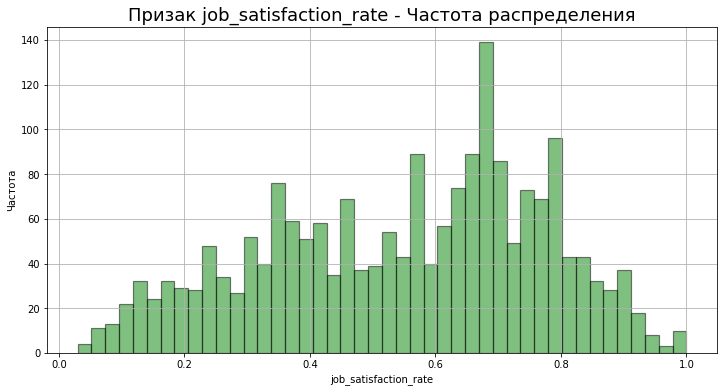

In [47]:
create(df_test_target_job_satisfaction_rate, 'job_satisfaction_rate', 'hist', bins = 44, color = 'green')

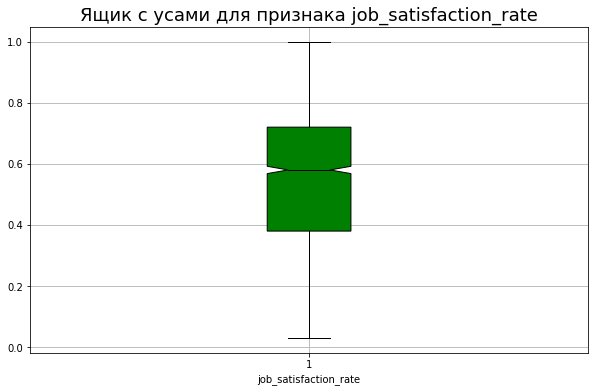

In [48]:
create(df_test_target_job_satisfaction_rate, 'job_satisfaction_rate', 'boxplot', color = 'green')

**Диаграмма hist:**

Наблюдается бимодальное распределение с двумя пиками: одним около нижнего предела шкалы удовлетворенности и другим около верхнего. Такое распределение может указывать на то, что в компании присутствуют как очень довольные своей работой сотрудники, так и те, кто совсем не доволен.

**Диаграмма boxplot:**

Медианное значение (линия в середине ящика) находится выше среднего уровня, что указывает на то, что более половины сотрудников имеют уровень удовлетворенности выше среднего.

Выбросов не наблюдается

### Корелляционный анализ

In [49]:
df_train_job_satisfaction_rate = df_train_job_satisfaction_rate.set_index('id')

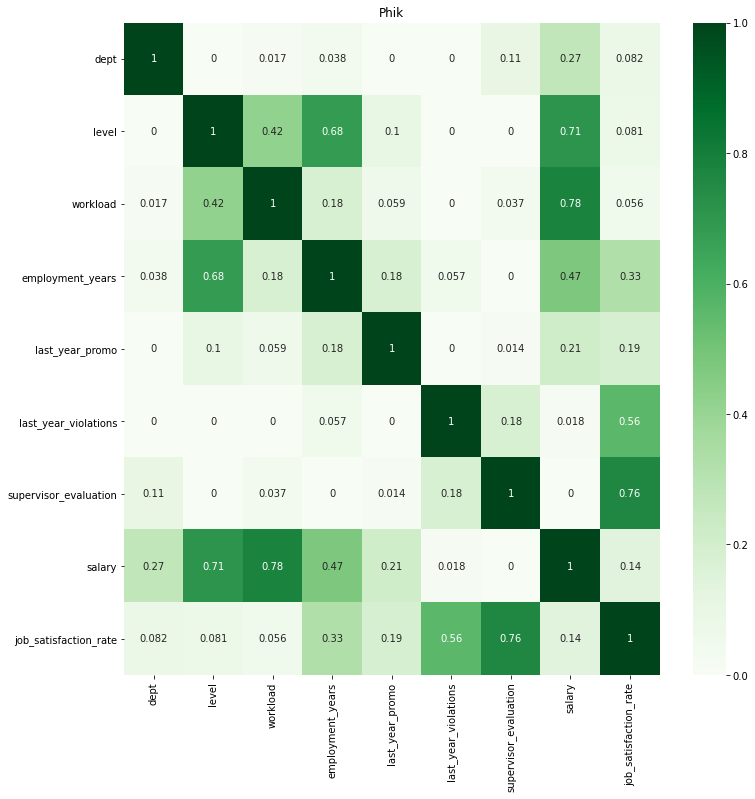

In [50]:
interval_cols = ['salary', 'job_satisfaction_rate']
corr_matrix = df_train_job_satisfaction_rate.phik_matrix(interval_cols = interval_cols)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Phik')
plt.show()

* Наблюдается сильная положительная корелляция между workload и salary (78%)
* job_satisfaction_rate также имеет сильную положительную корреляцию с supervisor_evaluation (76%), что может означать, что удовлетворенность работой увеличивается с оценкой работы которую дал руководитель 
* Переменная level имеет сильную положительную корреляцию с salary (71%), что предполагает, что чем выше уровень или должность сотрудника, тем выше его зарплата.
* Также наблюдается умеренная положительная корреляция между employment_years и level (68%), указывающая на то, что сотрудники с более длительным стажем работы часто занимают более высокие должности.
* job_satisfaction_rate имеет умеренную корреляцию с last_year_violations (56%)
* workload и level имеют умеренную корреляцию (42%), что может указывать на то, что сотрудники на более высоких должностях имеют более высокую рабочую нагрузку.

Отсутствие сильной корреляции между last_year_promo (повышение в прошлом году) и другими переменными может указывать на то, что повышения рассматриваются независимо от других факторов, таких как уровень, нагрузка, стаж работы и зарплата.

Переменная dept (отдел) имеет слабые корреляционные связи со всеми другими переменными, что может означать, что динамика внутри отделов варьируется и не связана напрямую с указанными аспектами работы сотрудников.

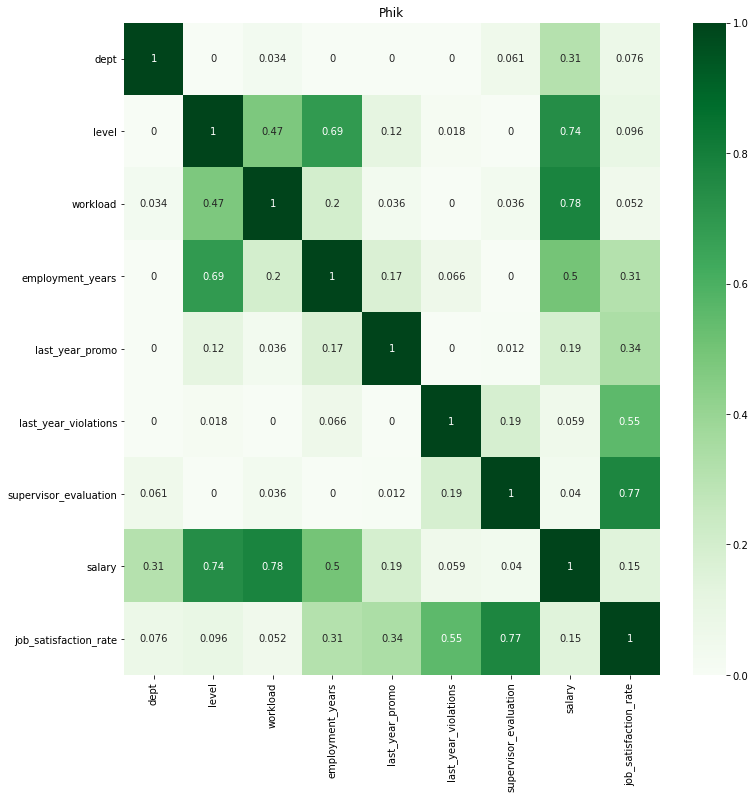

In [51]:
df_test_merge = df_test_features.merge(df_test_target_job_satisfaction_rate, on='id')
df_test_merge = df_test_merge.set_index('id')
corr_matrix = df_test_merge.phik_matrix(interval_cols = interval_cols)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Phik')
plt.show()

* Существует сильная положительная корреляция между salary и level, что предполагает, что чем выше уровень должности, тем выше зарплата.
* job_satisfaction_rate также имеет сильную положительную корреляцию с supervisor_evaluation, что может означать, что удовлетворенность работой увеличивается с оценкой работы которую дал руководитель.
* salary имеет высокую положительную корреляцию с workload, что может указывать на то, что сотрудники с более высокой зарплатой могут иметь большую рабочую нагрузку.
* employment_years также высоко коррелирует с level, что указывает на то, что сотрудники с высоким уровнем должности, обладают большим рабочим стажем.
* Также, существует умеренная корреляции между:
    * last_year_violations и job_satisfaction_rate
    * salary и employment_years
    * workload и level

### Промежуточный вывод по исследовательскому анализу данных

**Анализ данных 3 датасетов по диаграммам:**

1. *Датасет df_train_job_satisfaction_rate.*

Датасет представляет из себя картину компании с централизованным распределением нагрузки и зарплат с наличием выбросов на высокооплачиваемых позициях, стабильным но ограниченным карьерным ростом и положительным восприятием со стороны руководства, но с редкими повышениями и дисциплинарными нарушениями.

Выбросы не будем удалять, так как из-за этого модель может недообучиться.

2. *Датасет df_test_features.*

Датасет отображает картину компании с преобладанием средней рабочей нагрузки и зарплат в нижнем диапазоне, с тенденцией к положительному восприятию сотрудников со стороны руководства, но с ограниченными возможностями карьерного роста и высокой дисциплиной без значительных нарушений.

3. *Датасет df_test_target_job_satisfaction_rate.*

Распределение уровня удовлетворенности работой сотрудников показывает бимодальное распределение, что может свидетельствовать о наличии двух различных групп сотрудников: одна с высокой степенью удовлетворенности и другая с низкой. Медианное значение уровня удовлетворенности находится выше среднего, что указывает на то, что большинство сотрудников склонны быть удовлетворенными своей работой. Отсутствие выбросов на boxplot подтверждает равномерность данных и отсутствие аномально высоких или низких значений удовлетворенности среди сотрудников.

**Корелляционный анализ:**
1. *Датасет df_train_job_satisfaction_rate:*

    * workload и salary: Сильная корреляция показывает, что зарплата увеличивается с увеличением рабочей нагрузки.
    * job_satisfaction_rate и supervisor_evaluation: Высокая корреляция указывает на связь между удовлетворенностью работой сотрудников и положительной оценкой их работы со стороны руководителя.
    * level и salary: Сильная связь между уровнем должности сотрудника и его зарплатой, что предполагает, что сотрудники на более высоких должностях получают большую зарплату.
2. *Датасет df_test_merge(df_test_features и df_test_target_job_satisfaction_rate):*
    * salary и level: Высокая корреляция указывает на прямую связь между ростом должности и увеличением заработной платы.
    * job_satisfaction_rate и supervisor_evaluation: Сильная положительная корреляция свидетельствует о том, что более высокая удовлетворенность работой ассоциируется с лучшими оценками от руководителя.
    * salary и workload: Высокая корреляция может отражать тенденцию к более высокой зарплате у сотрудников с большей нагрузкой.
    * employment_years и level: Высокая корреляция указывает на то, что сотрудники с более длительным стажем работы чаще занимают более высокие должности

## Шаг 4. Подготовка данных


### Объединение датасетов

In [52]:
df_test_features = df_test_features.set_index('id')

df_test_target_job_satisfaction_rate = df_test_target_job_satisfaction_rate.set_index('id')

df_test_merge =  pd.merge(df_test_features, df_test_target_job_satisfaction_rate, left_index=True, right_index=True)

df_test_merge.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


### Подготовка данных

In [53]:
print('Количество дубликатов в объединенном датасете:', df_test_merge.duplicated().sum())

Количество дубликатов в объединенном датасете: 83


In [54]:
print(f'Количество пропусков:\n{df_test_merge.isna().sum()}')
print()
print(f'Размерность датафрейма: {df_test_merge.shape}')

Количество пропусков:
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Размерность датафрейма: (2000, 9)


### Разделение целевой переменной и признаков в тестовом датасете

In [55]:
df_test_merge_target = df_test_merge['job_satisfaction_rate']
df_test_merge_features =  df_test_merge.drop('job_satisfaction_rate', axis=1)

df_train_job_satisfaction_rate.drop_duplicates(inplace = True)
df_train_job_drop_job_satisfaction_rate = df_train_job_satisfaction_rate.drop('job_satisfaction_rate', axis=1)

In [56]:
df_train_job_drop_job_satisfaction_rate.drop_duplicates(inplace=True)
df_train_job_satisfaction_rate = df_train_job_satisfaction_rate.loc[df_train_job_drop_job_satisfaction_rate.index]

train_target = df_train_job_satisfaction_rate['job_satisfaction_rate']

## Шаг 5. Обучение модели

### Разделение признаков для кодировщиков

In [57]:
ord_cols = ['level', 'workload']
ohe_cols = ['dept', 'last_year_promo', 'last_year_violations']

### Создание пайплайна

In [58]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
])

In [59]:
ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'sinior'], 
                                       ['low', 'medium', 'high'], 
                                       ],
                                         handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(strategy='most_frequent'))
])

numeric_pipe = Pipeline(steps=[
    ('scaler', RobustScaler())
])

data_preprocessor = ColumnTransformer(transformers=[
    ('ohe', ohe_pipe, ohe_cols),
    ('ord', ord_pipe, ord_cols),
    ('num', numeric_pipe, num_col_test_features),
], remainder='passthrough')

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [60]:
param_grid = [
    {'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
     'models__max_depth': range(1,80),
     'models__max_features': range(2,50),
     'models__min_samples_leaf': range(1,5),
     'models__min_samples_split': range(2,20)
    },
    
    {
        'models': [LinearRegression()] 
    },
]

random_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=make_scorer(smape, greater_is_better=False),
    n_jobs=-1,
    random_state=RANDOM_STATE
    )

random_search.fit(df_train_job_drop_job_satisfaction_rate, train_target)

print('Лучшая модель и ее параметры:\n\n', random_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', random_search.best_score_)

Лучшая модель и ее параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                              

In [61]:
pred = random_search.predict(df_test_merge_features)
score=make_scorer(smape,greater_is_better=False)
smape_score = score(random_search.best_estimator_, df_test_merge_features, df_test_merge_target)
print(f'Метрика SMAPE на тестовой выборке: {smape_score}')

Метрика SMAPE на тестовой выборке: 14.23995695569547


## Шаг 6. Вывод по задаче 1
В результате лучшей моделью стало дерево решений с такими гиперпараметрами:
* max_depth=39 
* max_features=10,
* min_samples_leaf=2
* min_samples_split=12,

Результат метрик:
* Метрика SMAPE на тестовой выборке равна 14.4
* Метрика лучшей модели на тренировочной выборке равна 18.6

Этот тип модели эффективно справляется с нелинейными связями между переменными и обладает способностью к автоматическому отбору и трансформации признаков, что оказывается важным в контексте нашего набора данных. В сравнении с логистической и линейной регрессией, дерево решений является более мощным инструментом благодаря своим обширным настройкам и параметрам, которые можно адаптировать под конкретные задачи.

# Задача 2

## Шаг 1. Загрузка данных

In [62]:
try:
    df_train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    df_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')
except:
    print('Файла не существует')

### Датасет df_train_quit

**Общая информация о датасете**

In [63]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


**Первые 5 строк датасета**

In [64]:
display(df_train_quit.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


**Описание данных**

* id — уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника;
* quit — увольнение сотрудника из компании.

**Вывод по датасету df_train_quit**

1. Пропусков в датасете не обнаружено
2. Типы данных в столбцах корректны
3. Возможно присутствуют дубликаты

### Датасет df_test_quit

**Общая информация о датасете**

In [65]:
df_test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Первые 5 строк датасета**

In [66]:
display(df_test_quit.head())

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


**Описание данных**

* id — уникальный идентификатор сотрудника;
* quit — увольнение сотрудника из компании.

**Вывод по датасету df_test_quit**

1. Пропусков не обнаружено
2. Типы данных в столбцах корректны
3. Возможно присутствуют дубликаты

### Промежуточный вывод по загрузке данных

В обоих датасетах нет пропусков, типы данных корректны и возможно наличие дубликатов.

## Шаг 2. Предобработка данных

*Создадим список датафреймов:*

In [67]:
data_frames_2 = [df_train_quit, df_test_quit]

### Обработка дубликатов

#### Явные дубликаты

In [68]:
for data_2 in data_frames_2: 
    data_name_2 = [key for key, value in locals().items() if value is data_2][0]
    if data_2.duplicated(subset = data_2.columns).sum() > 0:
        display(data_2[data_2.duplicated()])
    else:
        print(f'Дубликаты в {data_name_2} отсутствуют')

Дубликаты в df_train_quit отсутствуют
Дубликаты в df_test_quit отсутствуют


#### Неявные дубликаты

In [69]:
num_col_quit, cat_col_quit = cat_num_col(df_train_quit)

In [70]:
num_col_quit_features, cat_col_quit_features = cat_num_col(df_test_quit)

In [71]:
print('Датасет df_train_quit')
for col_name_quit in cat_col_quit:
    print(f'Уникальные значений в столбце {col_name_quit}: {df_train_quit [col_name_quit].unique()}')
print('\n')
print('Датасет df_test_quit')
for col_name_quit in cat_col_quit_features:
    print(f'Уникальные значений в столбце {col_name_quit}: {df_test_quit [col_name_quit].unique()}')

Датасет df_train_quit
Уникальные значений в столбце dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Уникальные значений в столбце level: ['middle' 'junior' 'sinior']
Уникальные значений в столбце workload: ['high' 'medium' 'low']
Уникальные значений в столбце last_year_promo: ['no' 'yes']
Уникальные значений в столбце last_year_violations: ['no' 'yes']
Уникальные значений в столбце quit: ['no' 'yes']


Датасет df_test_quit
Уникальные значений в столбце quit: ['yes' 'no']


### Промежуточный вывод по предобратке данных

Дубликатов в датасетах обнаружено не было

## Шаг 3. Исследовательский анализ данных

### Анализ датасетов 

#### Анализ датасета df_train_quit с использованием метода describe

In [72]:
display(df_train_quit.describe())

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


Наблюдается разнообразие в уровнях зарплат и средний опыт работы сотрудников, а также что оценки руководителя варьируются, но в целом находятся в среднем диапазоне.

#### Анализ датасета df_train_quit с использованием диаграмм

**Признак 'dept'**

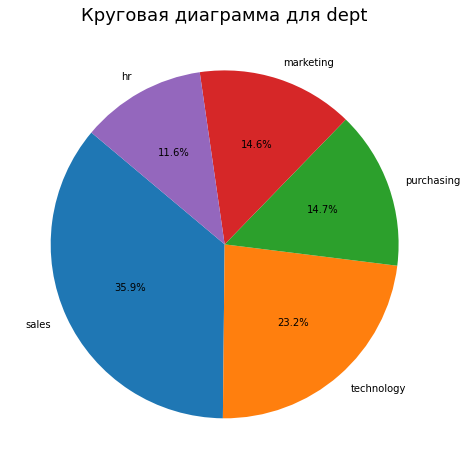

In [73]:
create(df_train_quit, 'dept', 'pie')

* sales занимает самую большую часть диаграммы, 35.9%.
* technology составляет 23.2%.
* purchasing и marketing занимают почти равные доли, 14.7% и 14.6% соответственно.
* HR занимает меньшую часть, 11.6%.

**Признак 'level'**

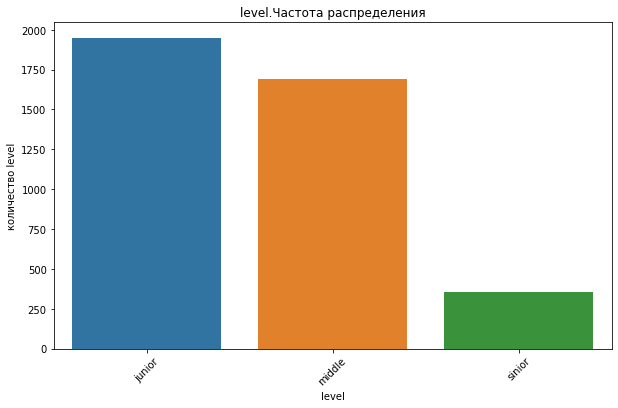

In [74]:
create(df_train_quit, 'level', 'barplot')

* Junior: Это самая большая группа, насчитывающая около 2000 сотрудников;
* Middle: Вторая по величине группа с примерно 1750 сотрудниками;
* Senior: Наименьшая группа, состоящая примерно из 750 сотрудников.

**Признак 'workload'**

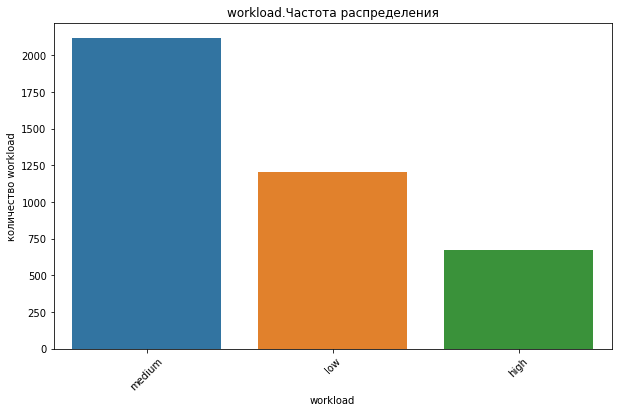

In [75]:
create(df_train_quit, 'workload', 'barplot')

* Medium: Это наиболее часто встречаемая категория, с более чем 2000 сотрудниками;
* Low: Следующая по численности группа, состоящая примерно из 1500 сотрудников;
* High: Самая маленькая группа, состоящая примерно из 750 сотрудников

**Признак 'employment_years'**

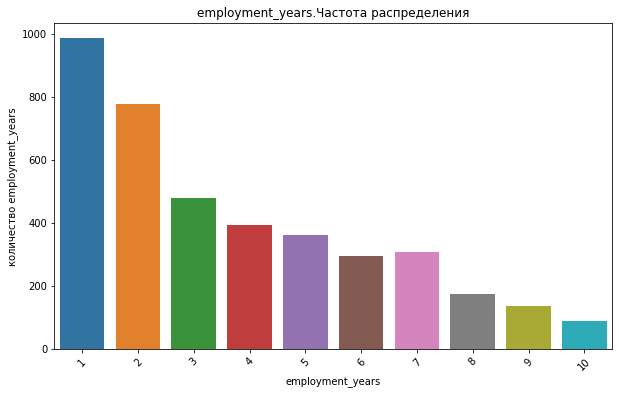

In [76]:
create(df_train_quit, 'employment_years', 'barplot')

* 1 год: Большинство сотрудников (около 1000) работают в компании в течение одного года;
* 2-3 года: Следующие по численности группы состоят из сотрудников, работающих в компании 2 и 3 года, количество которых постепенно уменьшается;
* 4+ лет: С увеличением количества лет работы в компании, число сотрудников продолжает уменьшаться;
* 10 лет: Наименьшее количество сотрудников работает в компании десять лет

**Признак 'last_year_promo'**

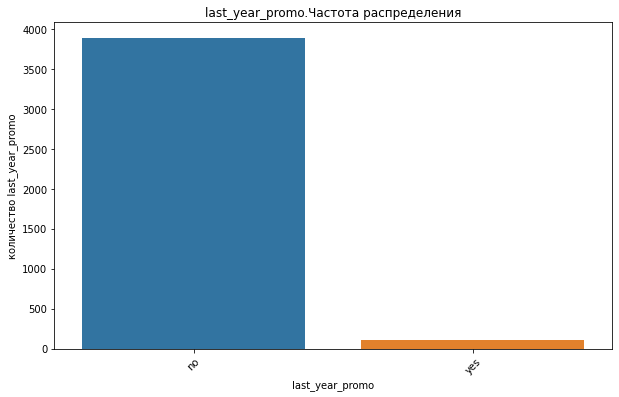

In [77]:
create(df_train_quit, 'last_year_promo', 'barplot')

**Признак 'last_year_violations'**

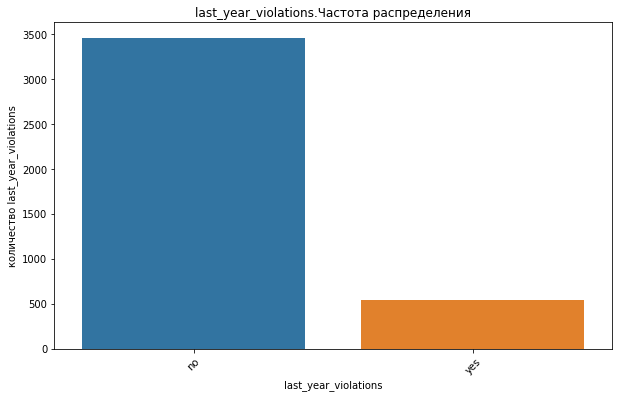

In [78]:
create(df_train_quit, 'last_year_violations', 'barplot')

* Не имели нарушений (no): Значительное большинство сотрудников, как показано высоким столбцом, не имели никаких нарушений в прошлом году;
* Имели нарушения (yes): Сравнительно меньшее количество сотрудников имели какие-то нарушения

**Признак 'supervisor_evaluation'**

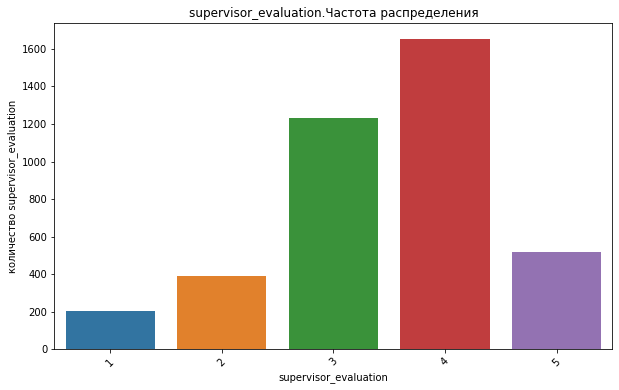

In [79]:
create(df_train_quit, 'supervisor_evaluation', 'barplot')

* Оценка 1: Очень мало сотрудников получили самую низкую оценку;
* Оценка 2: Несколько больше сотрудников получили эту оценку;
* Оценка 3: Значительное количество сотрудников оценено на среднем уровне;
* Оценка 4: Самая большая группа сотрудников получила эту оценку;
* Оценка 5: Меньше сотрудников получили наивысшую оценку, но больше чем тех, кто получил оценку 1 или 2.

**Признак 'salary'**

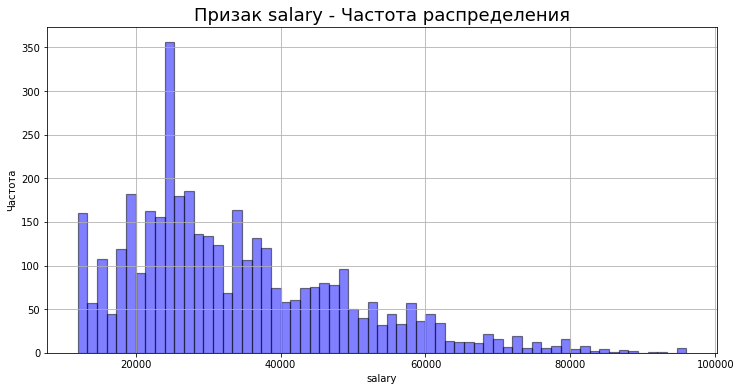

In [80]:
create(df_train_quit, 'salary', 'hist', bins = 63)

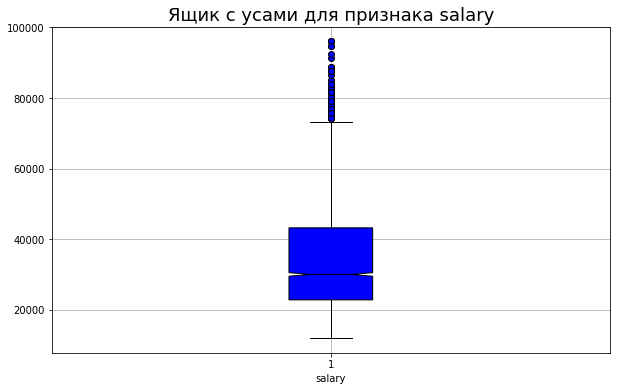

In [81]:
create(df_train_quit, 'salary', 'boxplot')

Большинство сотрудников получает умеренную зарплату, в то время как небольшое количество сотрудников зарабатывает значительно больше.

На графике boxplot видны выбросы, но удалять их не будем, так как это вполне возможные значения заработной платы для высоких должностей

**Признак 'quit'**

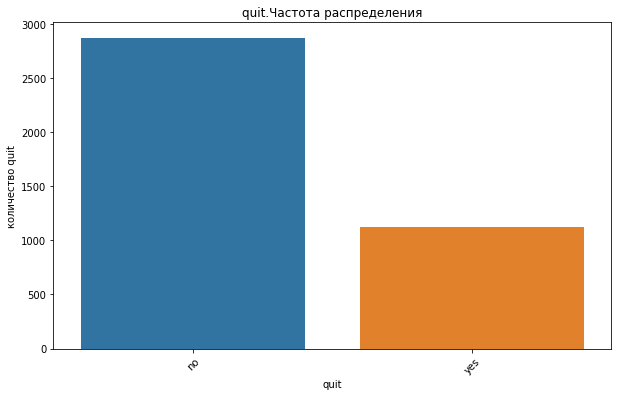

In [82]:
create(df_train_quit, 'quit', 'barplot')

* 'no': эта категория значительно преобладает над другой;
* 'yes': категория меньше по численности

#### Анализ датасета df_test_quit с использованием диаграмм

**Признак 'quit'**

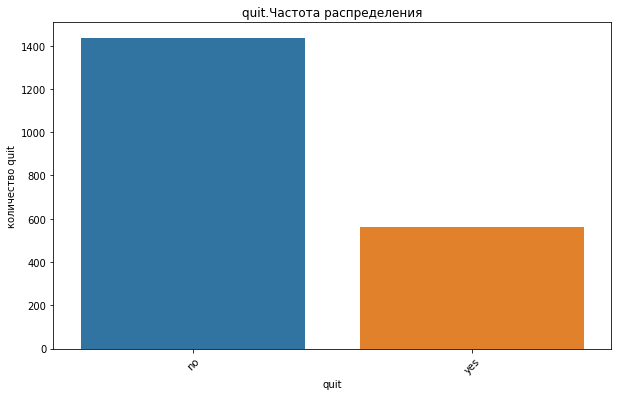

In [83]:
create(df_test_quit, 'quit', 'barplot')

Наблюдается значительное преобладание сотрудников, которые не уволились, над уволившимися сотрудниками (количество уволившихся меньше в 2.5 раза)

### Составление портрета «уволившегося сотрудника»

In [84]:
df_quit_yes = df_train_quit[df_train_quit['quit'] == 'yes']

df_quit_no = df_train_quit[df_train_quit['quit'] == 'no']

print(df_quit_yes.columns)

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')


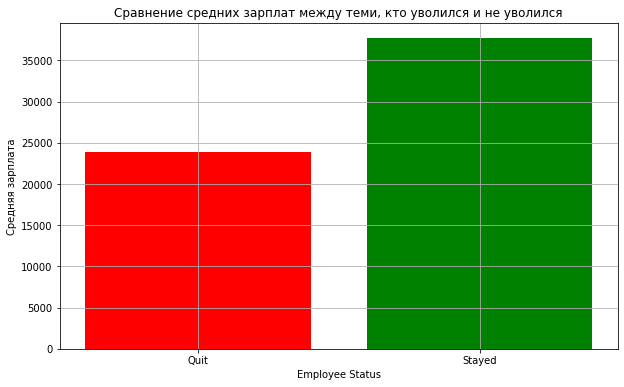

Средняя зарплата уволившего сотрудника = 23885
Средняя зарплата не уволившегося сотрудника = 37702
Разница в средней зарплате между уволившимся и не уволившимся сотрудниками = 13817


In [85]:
quit_yes_mean = round(df_quit_yes['salary'].mean())
quit_no_mean = round(df_quit_no['salary'].mean())

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar('Quit', quit_yes_mean, color='red')
plt.bar('Stayed', quit_no_mean, color='green')
plt.xlabel('Employee Status')
plt.ylabel('Средняя зарплата')
plt.title('Сравнение средних зарплат между теми, кто уволился и не уволился')
plt.grid(True)
plt.show()

# Вывод информации о разнице в зарплате
print(f"Средняя зарплата уволившего сотрудника = {quit_yes_mean}")
print(f"Средняя зарплата не уволившегося сотрудника = {quit_no_mean}")
print(f"Разница в средней зарплате между уволившимся и не уволившимся сотрудниками = {quit_no_mean - quit_yes_mean}")

**Сравним в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности с оставшимся сотрудником**

**Сравнение отделов в которых уволились сотрудники и остались**

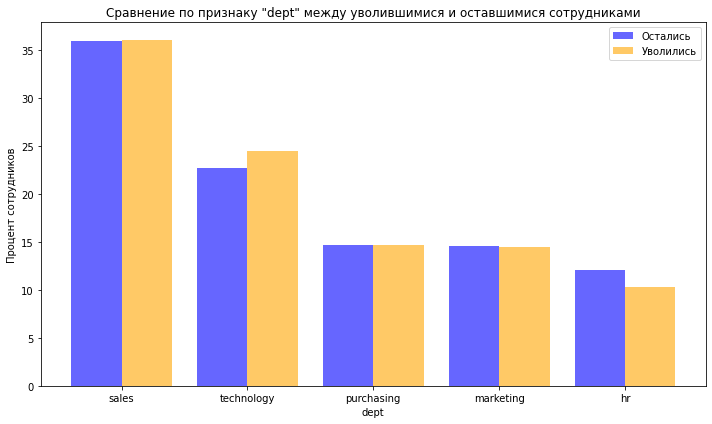

In [86]:
compare_columns(df_quit_no, df_quit_yes, 'dept')

* В отделе продаж (sales) больший процент сотрудников уволился по сравнению с другими отделами.
* В технологическом отделе (technology) процент уволившихся сотрудников также велик, но несколько меньше, чем в отделе продаж.
* Отделы закупок (purchasing) и маркетинга (marketing) имеют примерно равные доли уволившихся и оставшихся сотрудников.
* В HR-отделе меньше всего процент уволившихся сотрудников по сравнению с теми, кто остался работать в компании.

**Сравнение уровней загруженности у уволившихся сотрудников и оставшихся сотрудников**

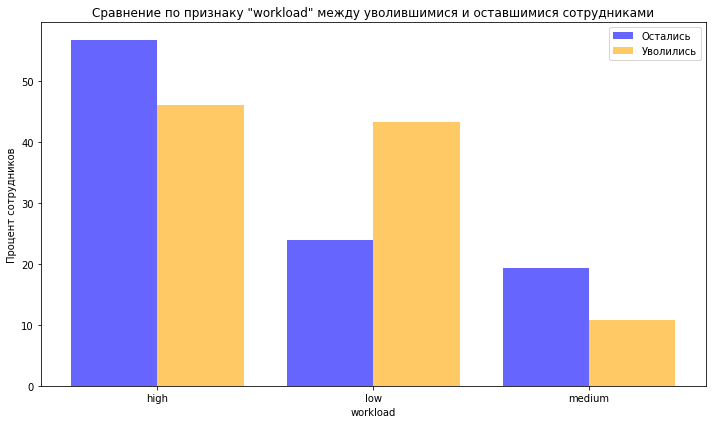

In [87]:
compare_columns(df_quit_no, df_quit_yes, 'workload')

* Среди сотрудников с высокой рабочей нагрузкой ("high") процент уволившихся заметно выше, чем среди сотрудников с низкой и средней нагрузкой ("low" и "medium").
* В группе с низкой рабочей нагрузкой процент уволившихся и оставшихся сотрудников почти равен.
* Сотрудники со средней рабочей нагрузкой ("medium") чаще оставались в компании, в отличие от тех, кто испытывал высокую нагрузку.

**Сравним уровни у уволившихся сотрудников и оставшихся сотрудников**

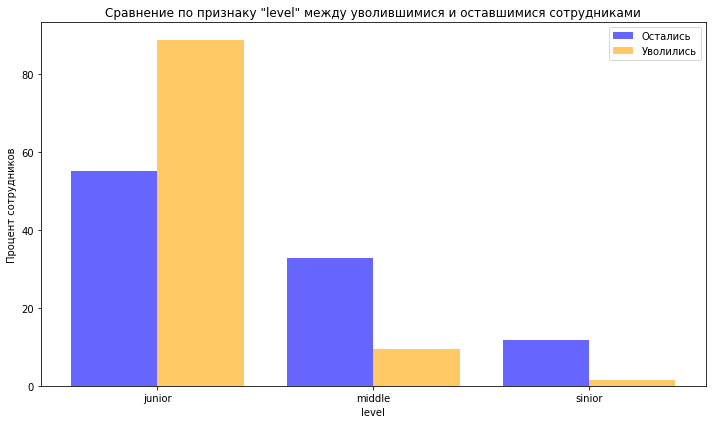

In [88]:
compare_columns(df_quit_no, df_quit_yes, 'level')

* Среди сотрудников начального уровня (junior) процент уволившихся выше, чем среди более опытных коллег.
* На уровне средней квалификации (middle) виден уже небольшой процент уволившихся сотрудников.
* Среди сотрудников высокого уровня (senior) процент уволившихся наименьший.

**Сравним длительность работы в фирме у уволившихся сотрудников и оставшихся сотрудников**

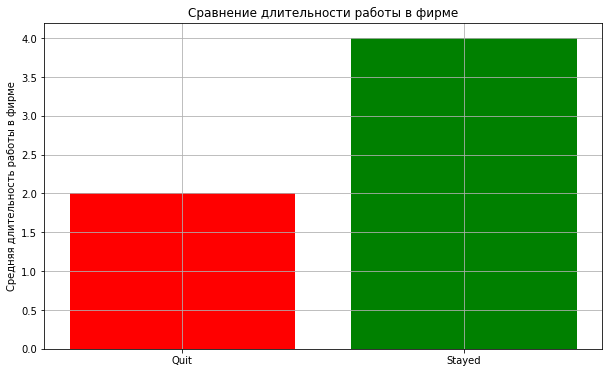

In [89]:
employment_years_yes_mean = round(df_quit_yes['employment_years'].mean())
employment_years_no_mean = round(df_quit_no['employment_years'].mean())

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar('Quit', employment_years_yes_mean, color='red')
plt.bar('Stayed', employment_years_no_mean, color='green')
plt.ylabel('Средняя длительность работы в фирме')
plt.title('Сравнение длительности работы в фирме')
plt.grid(True)
plt.show()

Большинство сотрудников, которые уволняются, в среднем работают около 2-х лет.

**Сравним количество повышений у уволившихся сотрудников и оставшихся сотрудников**

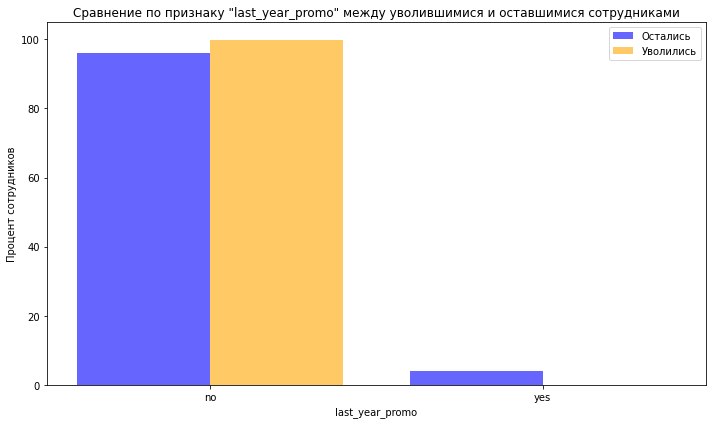

In [90]:
compare_columns(df_quit_no, df_quit_yes, 'last_year_promo')

* Среди сотрудников, которые не получили повышение в прошлом году, процент уволившихся чуть выше, чем среди тех, кто получил повышение.
* Напротив, среди сотрудников, получивших повышение, уволившиеся сотрудники отсутствуют. Тех, кто остался в компании и получили повышение в прошлом году, очень мало.

**Сравним количество нарушений у уволившихся сотрудников и оставшихся сотрудников**

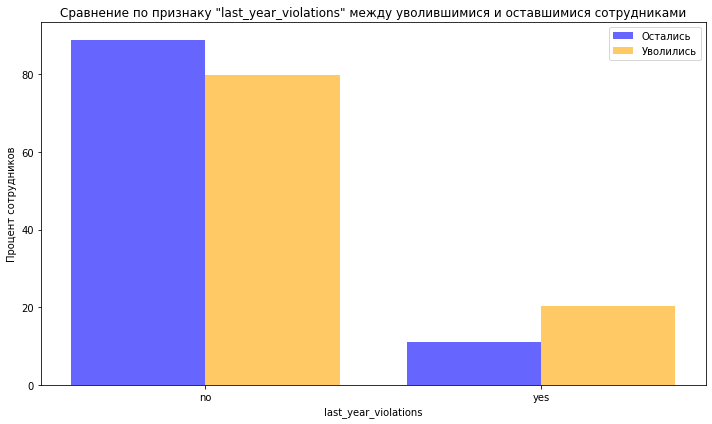

In [91]:
compare_columns(df_quit_no, df_quit_yes, 'last_year_violations')

* Большинство сотрудников, у которых не было нарушений в прошлом году, остались работать в компании.
* Среди сотрудников, у которых были нарушения, процент уволившихся заметно выше, чем тех кто остался. Тем не менее, некоторые сотрудники с нарушениями также остались в компании.

#### Сравнение удовлетворенности уволившегося сотрудника и оставшегося

**Для оценки удовлетворенности уволившегося сотрудника и оставшегося нужно объединить датасет из первой задачи с датасетом из второй**

In [92]:
df_test_quit = df_test_quit.set_index('id')

display(df_test_quit.head())

,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes


In [93]:
df_quit_merge = df_test_merge.merge(df_test_quit, left_index = True, right_index = True)

df_quit_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1997 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               1999 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
 9   quit                   2000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 171.9+ KB


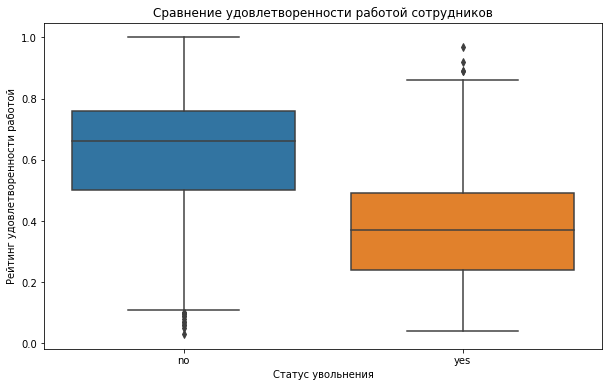

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quit', y='job_satisfaction_rate', data=df_quit_merge)
plt.title('Сравнение удовлетворенности работой сотрудников')
plt.xlabel('Статус увольнения')
plt.ylabel('Рейтинг удовлетворенности работой')
plt.show()

* У сотрудников, которые не уволились, медианное значение удовлетворенности работой выше, чем у тех, кто уволился. Это указывает на более высокую общую удовлетворенность работой среди оставшихся сотрудников.
* У уволившихся сотрудников диапазон удовлетворенности работой шире, медианное значение удовлетворенности работой ниже

### Промежуточный вывод по исследовательскому анализу данных

Уволившийся сотрудник, как показывают данные, чаще всего работал в отделе продаж или в технологическом отделе, где процент увольнений был наиболее высоким. Он мог чувствовать себя подавленным высокой рабочей нагрузкой, поскольку большая доля таких сотрудников решила покинуть компанию. Скорее всего, этот сотрудник получал зарплату ниже среднего уровня, возможно, из-за недостаточной оценки его труда или невысокой должности. Разница в зарплате с теми, кто остался, составила 13817, что могло послужить дополнительным фактором недовольства и, как следствие, решения об увольнении.

Также удовлетворенность работой у уволившихся была ниже, чем у тех, кто продолжил работать в компании. Это могло быть связано с ощущением недооцененности или из-за других аспектов работы, которые не соответствовали их ожиданиям или амбициям.

## Шаг 4. Добавление нового входного признака

**Предскажем уровень удовлетворенности сотрудника для добавления в датасеты**

In [95]:
df_train_quit = df_train_quit.set_index('id')
df_train_quit_drop_quit = df_train_quit.drop(['quit'], axis = 1)

In [96]:
df_quit_merge_drop_quit = df_quit_merge.drop(['job_satisfaction_rate', 'quit'], axis = 1)

In [97]:
pred_2 = random_search.predict(df_train_quit_drop_quit)
pred_3 = random_search.predict(df_quit_merge_drop_quit)
df_train_quit['job_satisfaction_rate_pred'] = pred_2
df_quit_merge['job_satisfaction_rate_pred'] = pred_3


display(df_train_quit.head())
display(df_quit_merge.head())

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.672727
814010,sales,junior,medium,2,no,no,4,27600,no,0.860000
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.326667
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.348750
910140,marketing,junior,medium,2,no,no,5,25200,no,0.806667


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit,job_satisfaction_rate_pred
id,,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no,0.888000
686555,hr,junior,medium,1,no,no,4,30000,0.72,no,0.656364
467458,sales,middle,low,5,no,no,4,19200,0.64,no,0.661250
418655,sales,middle,low,6,no,no,4,19200,0.60,no,0.661250
789145,hr,middle,medium,5,no,no,5,40800,0.75,no,0.853750


In [98]:
df_quit_merge = df_quit_merge.drop('job_satisfaction_rate', axis = 1)

## Шаг 5. Подготовка данных

### Проверка на дубликаты

In [99]:
df_train_quit_features = df_train_quit
print('Количетсво дубликатов в df_train_quit_features =', df_train_quit_features.duplicated().sum())

Количетсво дубликатов в df_train_quit_features = 1413


### Разделение на признаки

In [100]:
df_train_quit_features.drop_duplicates(inplace=True)
df_train_quit = df_train_quit.loc[df_train_quit_features.index]

In [101]:
ohe_cols_2 = ['dept', 'last_year_promo', 'last_year_violations']
ord_cols_2  = ['level', 'workload']
num_cols_2 = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
label_cols_2 = ['quit']

## Шаг 6. Обучение модели

In [102]:
ohe_pipe_2 = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
])

ord_pipe_2 = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'sinior'], 
                                       ['low', 'medium', 'high'], 
                                       ],
                                         handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(strategy='most_frequent'))
])

num_pipe_2 = Pipeline(steps=[
    ('quantile', QuantileTransformer())
])

label_pipe_2 = Pipeline([
    ('label_encoder', LabelEncoder())
]
)

df_test_final_features = df_quit_merge.drop(['quit'], axis=1)
df_test_final_tagret = df_quit_merge['quit']
df_train_quit_features = df_train_quit.drop(['quit'], axis = 1)
df_train_quit_target = df_train_quit['quit']

data_preprocessor_2 = ColumnTransformer(transformers=[
    ('ohe', ohe_pipe_2, ohe_cols_2),
    ('ord', ord_pipe_2, ord_cols_2),
    ('num', num_pipe_2, num_cols_2),
    ('label',label_cols_2, label_cols_2 )
], remainder='passthrough')

pipe_final_2 = Pipeline([
    ('preprocessor', data_preprocessor_2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [111]:
param_grid = [
    {
     'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(2, 10),
     'models__max_features': range(2,10),
     'models__min_samples_leaf': range(1,10),
     'models__min_samples_split': range(2,20)
    }, 

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': [1, 5, 10],
    }, 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [5, 7, 9], 
    },
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': range(1, 10),  
        'models__max_depth': range(2, 10),  
        'models__min_samples_split': range(2, 10),  
        'models__min_samples_leaf': range(1, 4),  
        'models__max_features': ['auto', 'sqrt']
    }
]

random_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE)

random_search.fit(df_train_quit_features, df_train_quit_target)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['dept',
                                        

In [112]:
pred_quit = random_search.predict_proba(df_test_final_features)[:,1]

print('Лучшая модель и ее параметры:\n\n', random_search.best_estimator_)
print('Метрика при кросс-валидации:', random_search.best_score_)
print('Площадь ROC-кривой:', roc_auc_score(df_test_final_tagret, pred_quit))

Лучшая модель и ее параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                              

## Шаг 7. Вывод по задаче 2
В результате выполнения второй задачи, лучшей моделью стала модель случайного леса с такими гиперпараметрами:
* max_depth=5,
* max_features='sqrt',
* min_samples_leaf=2, 
* n_estimators=7,
* random_state=42

Результат метрик:
* Метрика при кросс-валидации: 0.9138881340882742
* Площадь ROC-кривой: 0.9200090381082203

# Общий вывод

**Датасеты:**
* Первой задачи:
    * Тренировочная выборка: df_train_job_satisfaction_rate
    * Входные признаки тестовой выборки: df_test_features
    * Целевой признак тестовой выборки: df_test_target_job_satisfaction_rate
* Второй задачи:
    * Тренировочная выборка: df_train_quit
    * Входные признаки тестовой выборки те же, что и в прошлой задаче: df_test_features
    * Целевой признак тестовой выборки: df_test_target_quit

**Изучение датасетов:**
1. В датасетах df_train_job_satisfaction_rate и df_test_features есть пропуски. 
2. Типы данных корректны во всех датасетах. 

**Предобработка данных:**
1. Дубликаты отстутсвуют
2. Пропуски в датасетах df_test_features и df_train_job_satisfaction_rate были заменены на np.nan для дальнейшей обработки**

**Исследовательский анализ данных:**
* Для первой задачи:
1. *Датасет df_train_job_satisfaction_rate:*
    * workload и salary: Сильная корреляция показывает, что зарплата увеличивается с увеличением рабочей нагрузки.
    * job_satisfaction_rate и supervisor_evaluation: Высокая корреляция указывает на связь между удовлетворенностью работой сотрудников и положительной оценкой их работы со стороны руководителя.
    * level и salary: Сильная связь между уровнем должности сотрудника и его зарплатой, что предполагает, что сотрудники на более высоких должностях получают большую зарплату.
2. *Датасет df_test_merge(df_test_features и df_test_target_job_satisfaction_rate):*
    * salary и level: Высокая корреляция указывает на прямую связь между ростом должности и увеличением заработной платы.
    * job_satisfaction_rate и supervisor_evaluation: Сильная положительная корреляция свидетельствует о том, что более высокая удовлетворенность работой ассоциируется с лучшими оценками от руководителя.
    * salary и workload: Высокая корреляция может отражать тенденцию к более высокой зарплате у сотрудников с большей нагрузкой.
    * employment_years и level: Высокая корреляция указывает на то, что сотрудники с более длительным стажем работы чаще занимают более высокие должности
    
* Для второй задачи:

Уволившийся сотрудник, как показывают данные, чаще всего работал в отделе продаж или в технологическом отделе, где процент увольнений был наиболее высоким. Он мог чувствовать себя подавленным высокой рабочей нагрузкой, поскольку большая доля таких сотрудников решила покинуть компанию. Скорее всего, этот сотрудник получал зарплату ниже среднего уровня, возможно, из-за недостаточной оценки его труда или невысокой должности. Разница в зарплате с теми, кто остался, составила 13817, что могло послужить дополнительным фактором недовольства и, как следствие, решения об увольнении.

Также удовлетворенность работой у уволившихся была ниже, чем у тех, кто продолжил работать в компании. Это могло быть связано с ощущением недооцененности или из-за других аспектов работы, которые не соответствовали их ожиданиям или амбициям.

**Обучение моделей**

1. **До добавления признака**

Лучшей моделью стало модель дерева решений с такими гиперпараметрами:
* max_depth=39 
* max_features=10,
* min_samples_leaf=2
* min_samples_split=12,

Результат метрик:
* Метрика SMAPE на тестовой выборке равна 14.4
* Метрика лучшей модели на тренировочной выборке равна 18.6

2. **После добавления нового признака**

Лучшей моделью стала модель случайного леса с такими гиперпараметрами:
* max_depth=5,
* max_features='sqrt',
* min_samples_leaf=2, 
* n_estimators=7,
* random_state=42

Результат метрик:
* Метрика при кросс-валидации: 0.9138881340882742
* Площадь ROC-кривой: 0.9200090381082203

Из результатов моделирования видно, что компания должна уделить внимание младшим сотрудникам, особенно в сферах продаж и IT. Рассмотрение возможности небольшого увеличения зарплаты может положительно повлиять на их моральное состояние, что, в свою очередь, может способствовать их более длительному пребыванию в компании.